In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('train.csv')

# Data Understanding

In [2]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

First few rows of the DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37

In [3]:
# Display a summary of the DataFrame including column names and data types
print("\nSummary of the DataFrame:")
print(df.info())


Summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
# Display the list of column names
print("\nList of column names:")
print(df.columns)


List of column names:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
# Iterate over each column and print the value counts
for column in df.columns:
    print(f"\nValue counts for column '{column}':")
    print(df[column].value_counts())


Value counts for column 'PassengerId':
PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64

Value counts for column 'Survived':
Survived
0    549
1    342
Name: count, dtype: int64

Value counts for column 'Pclass':
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Value counts for column 'Name':
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

Value counts for column 'Sex':
Sex
male  

# Data Cleaning

In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print the columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Age         177
Cabin       687
Embarked      2
dtype: int64


In [7]:
# Impute missing values for Age with median
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)
# Impute missing values for Cabin with 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)
# Impute missing values for Embarked with mode
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

In [8]:
# Check for missing values after imputation
missing_values_after_imputation = df.isnull().sum()
print("Missing values after imputation:")
print(missing_values_after_imputation[missing_values_after_imputation > 0])


Missing values after imputation:
Series([], dtype: int64)


In [9]:
df = df.drop('Name', axis=1)
df = df.drop('PassengerId', axis=1)
df = df.drop('Ticket', axis=1)
df = df.drop('Cabin', axis=1) # might not want to drop

In [10]:
print(df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


In [11]:
# Perform one-hot encoding for 'Sex' and 'Embarked' columns
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Sex' column
df['Sex_encoded'] = label_encoder.fit_transform(df['Sex'])

# Encode 'Embarked' column
df['Embarked_encoded'] = label_encoder.fit_transform(df['Embarked'])


In [13]:
# Drop original categorical columns if needed
df.drop(['Sex', 'Embarked'], axis=1, inplace=True)


In [14]:
print(df.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_encoded  \
0         0       3  22.0      1      0   7.2500            1   
1         1       1  38.0      1      0  71.2833            0   
2         1       3  26.0      0      0   7.9250            0   
3         1       1  35.0      1      0  53.1000            0   
4         0       3  35.0      0      0   8.0500            1   

   Embarked_encoded  
0                 2  
1                 0  
2                 2  
3                 2  
4                 2  


# Exploratory (Visual) Data Analysis

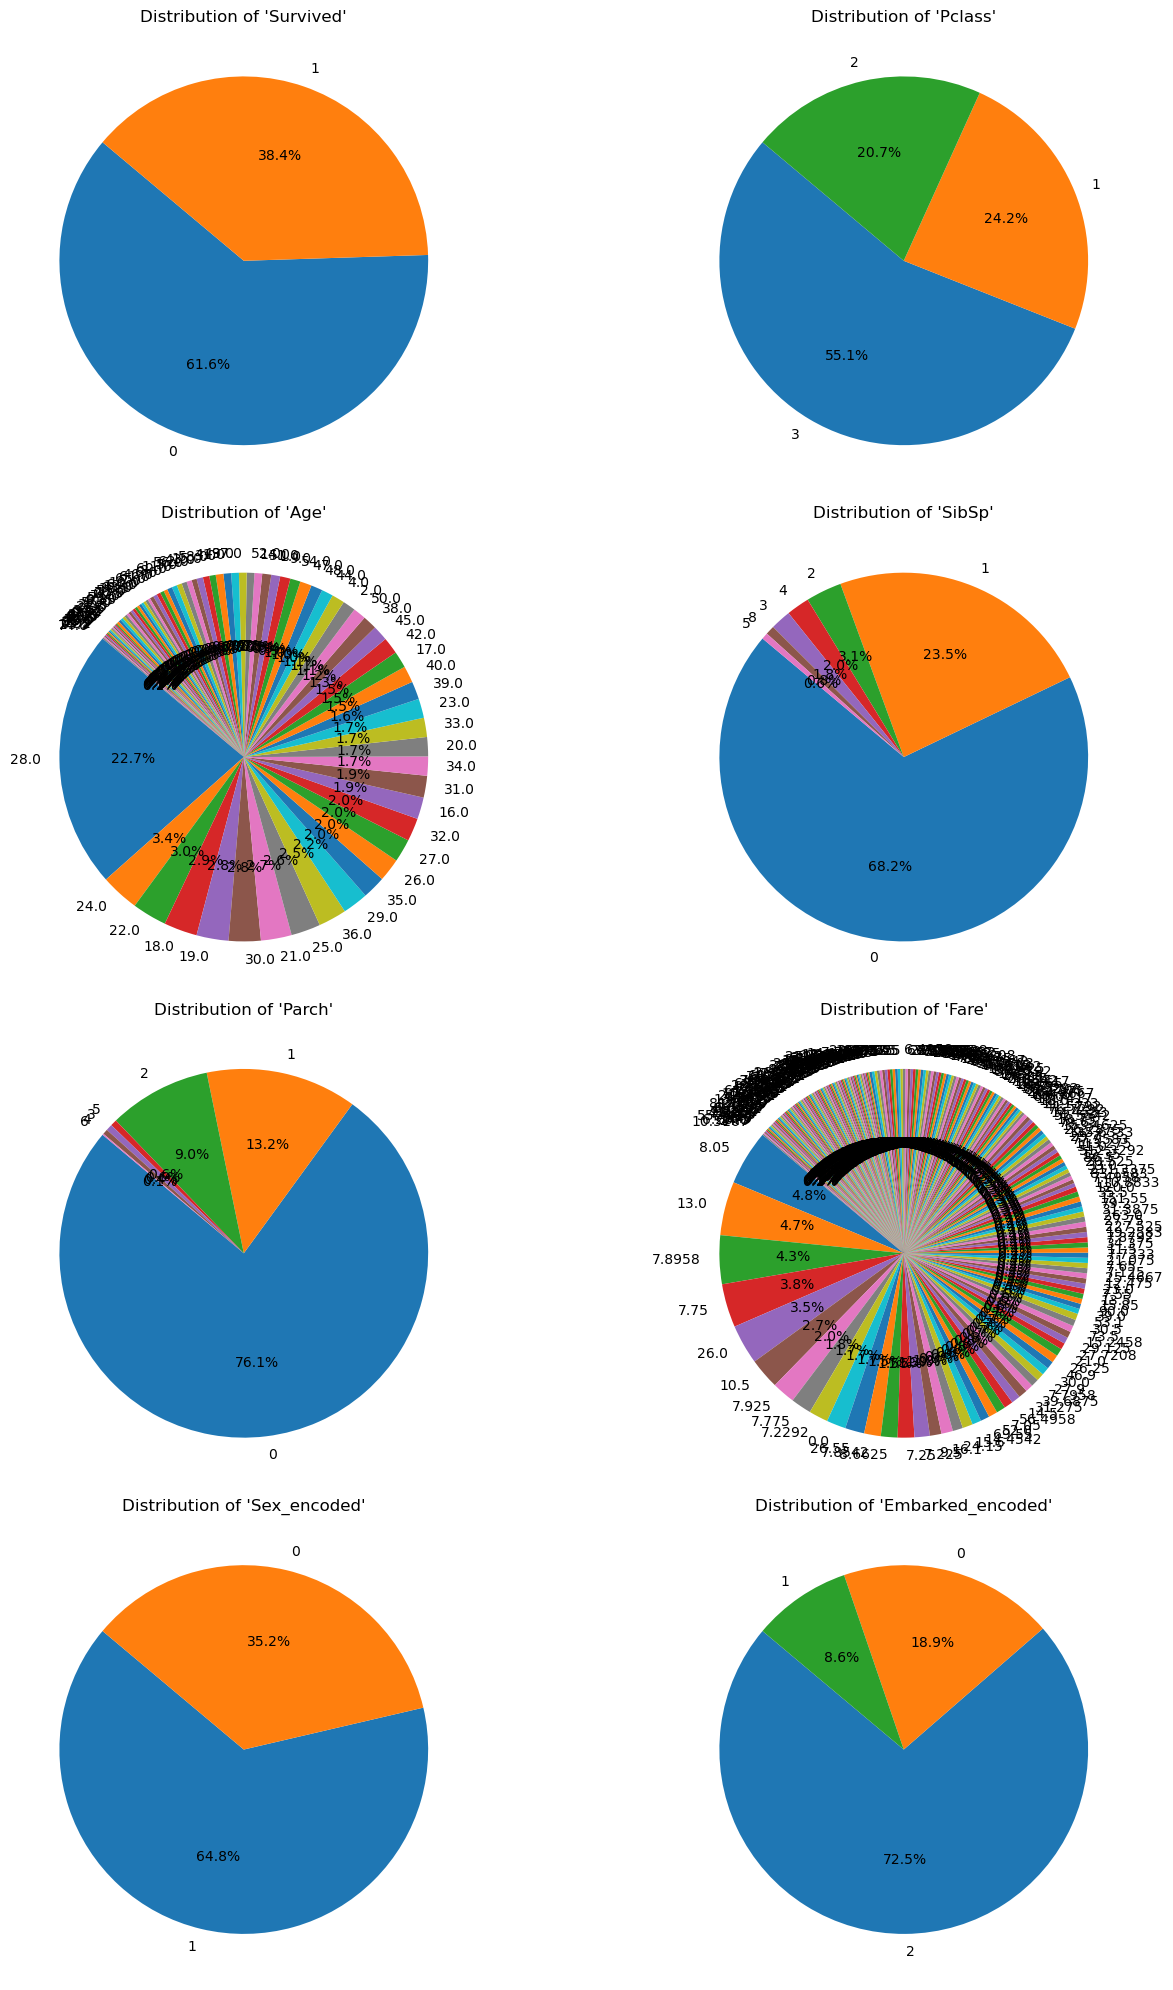

In [15]:
import matplotlib.pyplot as plt

# Set up subplots
num_cols = len(df.columns)
num_rows = num_cols // 2 + num_cols % 2  # Calculate number of rows needed for subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

# Flatten axes if it's a single row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Iterate over each column and create a pie chart
for i, column in enumerate(df.columns):
    ax = axes[i // 2, i % 2]  # Get the current axis
    counts = df[column].value_counts(normalize=True)  # Calculate normalized value counts
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f"Distribution of '{column}'")

# Adjust layout
plt.tight_layout()
plt.show()

# Data Splitting

In [16]:
from sklearn.model_selection import train_test_split

# Assuming df_encoded is the DataFrame after one-hot encoding
X = df_encoded.drop('Survived', axis=1)  # Features (all columns except 'Survived')
y = df_encoded['Survived']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (712, 8)
Shape of X_test: (179, 8)
Shape of y_train: (712,)
Shape of y_test: (179,)


In [17]:
print("X_train: ", X_train.dtypes)
print("y_train: ",y_train.dtypes)
print("X_test: ",X_test.dtypes)
print("y_test: ",y_test.dtypes)

X_train:  Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_male         bool
Embarked_Q       bool
Embarked_S       bool
dtype: object
y_train:  int64
X_test:  Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_male         bool
Embarked_Q       bool
Embarked_S       bool
dtype: object
y_test:  int64


In [18]:
import numpy as np

# Convert boolean columns to numeric values
# 1: True, 0 : False
X_train['Sex_male'] = X_train['Sex_male'].astype(int)
X_train['Embarked_Q'] = X_train['Embarked_Q'].astype(int)
X_train['Embarked_S'] = X_train['Embarked_S'].astype(int)

X_test['Sex_male'] = X_test['Sex_male'].astype(int)
X_test['Embarked_Q'] = X_test['Embarked_Q'].astype(int)
X_test['Embarked_S'] = X_test['Embarked_S'].astype(int)

# Convert DataFrame columns to NumPy arrays with appropriate data types
X_train_array = X_train.astype(np.float64).values
y_train_array = y_train.astype(np.float32).values.reshape(-1, 1)
X_test_array = X_test.astype(np.float32).values

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Define the neural network architecture
class TitanicNN(nn.Module):
    def __init__(self, input_size, dropout_rate=0.5):
        super(TitanicNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(64, 32)
        self.dropout3 = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = torch.sigmoid(self.fc4(x))
        return x

# Assuming X_train, X_test, y_train, y_test are already defined

# Convert DataFrame to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

# Create DataLoader for training and testing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Hyperparameters
param_grid = {
    'input_size': [X_train.shape[1]],
    'dropout_rate': [0.3, 0.4, 0.5],
    'lr': [0.001, 0.005, 0.01],
    'num_epochs': [20, 30, 40]
}

# Define model
model = TitanicNN(input_size=X_train.shape[1])

# Define loss function
criterion = nn.BCELoss()

# Initialize best accuracy and best hyperparameters
best_accuracy = 0.0
best_hyperparams = None

# Hyperparameter tuning
for input_size in param_grid['input_size']:
    for dropout_rate in param_grid['dropout_rate']:
        for lr in param_grid['lr']:
            for num_epochs in param_grid['num_epochs']:
                model = TitanicNN(input_size=input_size, dropout_rate=dropout_rate)
                optimizer = optim.Adam(model.parameters(), lr=lr)
                
                # Training the model
                for epoch in range(num_epochs):
                    model.train()
                    running_loss = 0.0
                    for inputs, labels in train_loader:
                        optimizer.zero_grad()
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                        loss.backward()
                        optimizer.step()
                        running_loss += loss.item()
                    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

                # Evaluation on testing data
                model.eval()
                predictions = []
                true_labels = []
                with torch.no_grad():
                    for inputs, labels in test_loader:
                        outputs = model(inputs)
                        predictions.extend(outputs.cpu().numpy())
                        true_labels.extend(labels.cpu().numpy())

                predictions = np.array(predictions)
                true_labels = np.array(true_labels)
                predictions = np.round(predictions)  # Round predictions to 0 or 1

                # Calculate accuracy
                accuracy = accuracy_score(true_labels, predictions)
                print(f"Accuracy: {accuracy}")
                
                # Update best hyperparameters if accuracy improves
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_hyperparams = {'input_size': input_size, 'dropout_rate': dropout_rate, 'lr': lr, 'num_epochs': num_epochs}

print("Best Accuracy:", best_accuracy)
print("Best Hyperparameters:", best_hyperparams)


Epoch 1/20, Loss: 0.7053340524435043
Epoch 2/20, Loss: 0.6697879383961359
Epoch 3/20, Loss: 0.6672869175672531
Epoch 4/20, Loss: 0.66673777004083
Epoch 5/20, Loss: 0.6259172906478246
Epoch 6/20, Loss: 0.6288584073384603
Epoch 7/20, Loss: 0.6253757402300835
Epoch 8/20, Loss: 0.6288907478253046
Epoch 9/20, Loss: 0.6283495475848516
Epoch 10/20, Loss: 0.6297918558120728
Epoch 11/20, Loss: 0.6429637322823206
Epoch 12/20, Loss: 0.6221039295196533
Epoch 13/20, Loss: 0.594565823674202
Epoch 14/20, Loss: 0.6268723954757055
Epoch 15/20, Loss: 0.6401086002588272
Epoch 16/20, Loss: 0.6314505338668823
Epoch 17/20, Loss: 0.6191643377145132
Epoch 18/20, Loss: 0.6365844110647837
Epoch 19/20, Loss: 0.6272233625253042
Epoch 20/20, Loss: 0.6265844603379568
Accuracy: 0.6815642458100558
Epoch 1/30, Loss: 0.8243179023265839
Epoch 2/30, Loss: 0.6958498408397039
Epoch 3/30, Loss: 0.6421168049176534
Epoch 4/30, Loss: 0.644684890906016
Epoch 5/30, Loss: 0.6571197658777237
Epoch 6/30, Loss: 0.6265527208646139
Ep

In [20]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset

# # Define the neural network architecture
# class TitanicNN(nn.Module):
#     def __init__(self, input_size):
#         super(TitanicNN, self).__init__()
#         self.fc1 = nn.Linear(input_size, 128)
#         self.dropout1 = nn.Dropout(0.5)  # Add dropout layer
#         self.fc2 = nn.Linear(128, 64)
#         self.dropout2 = nn.Dropout(0.5)  # Add dropout layer
#         self.fc3 = nn.Linear(64, 32)
#         self.dropout3 = nn.Dropout(0.5)  # Add dropout layer
#         self.fc4 = nn.Linear(32, 1)

#     def forward(self, x):
#         x = torch.relu(self.fc1(x))
#         x = self.dropout1(x)  # Apply dropout
#         x = torch.relu(self.fc2(x))
#         x = self.dropout2(x)  # Apply dropout
#         x = torch.relu(self.fc3(x))
#         x = self.dropout3(x)  # Apply dropout
#         x = torch.sigmoid(self.fc4(x))
#         return x

# # Convert DataFrame to PyTorch tensors
# X_train_tensor = torch.tensor(X_train.values, dtype=torch.float64)
# y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
# X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

# # Create DataLoader for training and testing
# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# df_testset = TensorDataset(X_test_tensor, y_test_tensor)
# test_loader = DataLoader(df_testset, batch_size=64, shuffle=False)

# # Initialize the model
# model = TitanicNN(input_size=X_train.shape[1])

# # Define loss function and optimizer
# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Training the model
# num_epochs = 20
# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     for inputs, labels in train_loader:
#         inputs = inputs.to(torch.float32)
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()
#     print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

# # Evaluation on testing data
# model.eval()
# predictions = []
# true_labels = []
# with torch.no_grad():
#     for inputs, labels in test_loader:
#         outputs = model(inputs)
#         predictions.extend(outputs.cpu().numpy())
#         true_labels.extend(labels.cpu().numpy())

# predictions = np.array(predictions)
# true_labels = np.array(true_labels)
# predictions = np.round(predictions)  # Round predictions to 0 or 1

# # Calculate accuracy
# accuracy = np.mean(predictions == true_labels)
# print("Accuracy:", accuracy)


# Test DataSet Processing and Evaluation

In [21]:
test_ids = X_test.index
test_ids = test_ids.values.flatten()
predictions = predictions.flatten()


# Assuming 'test_ids' contains the identifiers for the test instances
# and 'predictions' contains the predicted labels (0 or 1) for each test instance
submission_df = pd.DataFrame({
    'PassengerId': test_ids,
    'Survived': predictions.astype(int)  # Convert predictions to integers
})

# Save predictions to a CSV file so it can be submitted to Kaggle
submission_df.to_csv('submission.csv', index=False)


In [22]:
# Load the test dataset
df_test = pd.read_csv('test.csv')
df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
# Check for missing values in each column
missing_values_test = df_test.isnull().sum()

# Print the columns with missing values
print("Columns with missing values:")
print(missing_values_test[missing_values_test > 0])

Columns with missing values:
Age       86
Fare       1
Cabin    327
dtype: int64


In [24]:
# Impute missing values for Age with median
median_age = df_test['Age'].median()
df_test['Age'].fillna(median_age, inplace=True)
# Impute missing values for Cabin with 'Unknown'
df_test['Cabin'].fillna('Unknown', inplace=True)
# Impute missing values for Embarked with mode
mode_embarked = df_test['Embarked'].mode()[0]
df_test['Embarked'].fillna(mode_embarked, inplace=True)

In [25]:
print(df_test.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare    Cabin Embarked  
0  34.5      0      0   330911   7.8292  Unknown        Q  
1  47.0      1      0   363272   7.0000  Unknown        S  
2  62.0      0      0   240276   9.6875  Unknown        Q  
3  27.0      0      0   315154   8.6625  Unknown        S  
4  22.0      1      1  3101298  12.2875  Unknown        S  


In [26]:
# Check for missing values after imputation
missing_values_after_imputation = df.isnull().sum()
print("Missing values after imputation:")
print(missing_values_after_imputation[missing_values_after_imputation > 0])


Missing values after imputation:
Series([], dtype: int64)


In [27]:
# Preprocess the test data (same preprocessing steps as training data)
df_test = df_test.drop('Name', axis=1)
# df_test = df_test.drop('PassengerId', axis=1)
df_test = df_test.drop('Ticket', axis=1)
df_test = df_test.drop('Cabin', axis=1) # might not want to drop

In [28]:
print(df_test.head())

   PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0          892       3    male  34.5      0      0   7.8292        Q
1          893       3  female  47.0      1      0   7.0000        S
2          894       2    male  62.0      0      0   9.6875        Q
3          895       3    male  27.0      0      0   8.6625        S
4          896       3  female  22.0      1      1  12.2875        S


In [29]:
df_encoded = pd.get_dummies(df_test, columns=['Sex', 'Embarked'], drop_first=True)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Sex' column
df_test['Sex_encoded'] = label_encoder.fit_transform(df_test['Sex'])

# Encode 'Embarked' column
df_test['Embarked_encoded'] = label_encoder.fit_transform(df_test['Embarked'])

# Drop original categorical columns if needed
df_test.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [30]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_encoded
0,892,3,34.5,0,0,7.8292,1,1
1,893,3,47.0,1,0,7.0000,0,2
2,894,2,62.0,0,0,9.6875,1,1
3,895,3,27.0,0,0,8.6625,1,2
4,896,3,22.0,1,1,12.2875,0,2


In [31]:
# Convert DataFrame to PyTorch tensor
X_test_tensor = torch.tensor(df_test.values, dtype=torch.float32)

# Flatten the test data values before converting to tensor
# X_test_values = df_test.values.flatten()

# Convert flattened data to PyTorch tensor
X_test_tensor = torch.tensor(X_test_tensor, dtype=torch.float32)

# Create DataLoader for the test data
df_testset = TensorDataset(X_test_tensor)
test_loader = DataLoader(df_testset, batch_size=64, shuffle=False)

# Initialize the model (assuming it's already trained)
model = TitanicNN(input_size=X_test_tensor.shape[1])

# Set the model to evaluation mode
model.eval()

# Make predictions on the test data
predictions = []

with torch.no_grad():
    for batch_idx, (inputs,) in enumerate(test_loader):
        print('Batch Input shape:', inputs.shape)
        if batch_idx == 0:
            print('First element of inputs:', inputs[0])
        outputs = model(inputs)
        predictions.extend(outputs.cpu().numpy())

# Convert predictions to the required format (e.g., rounding to 0 or 1)
predictions = np.round(predictions)

# Check for NaN or infinite values
if np.isnan(predictions).any() or np.isinf(predictions).any():
    # Handle NaN or infinite values, for example, by replacing them with 0 or 1
    predictions[np.isnan(predictions)] = 0
    predictions[np.isinf(predictions)] = 1

# Convert predictions to integers
predictions = predictions.astype(int)

predictions = predictions.flatten()

# Use PassengerId in test dataset to create a submission DataFrame
submission_df = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],  # Assuming 'PassengerId' is the identifier for test instances
    'Survived': predictions.astype(int)  # Convert predictions to integers
})

# Save predictions to a CSV file
submission_df.to_csv('submission.csv', index=False)

Batch Input shape: torch.Size([64, 8])
First element of inputs: tensor([892.0000,   3.0000,  34.5000,   0.0000,   0.0000,   7.8292,   1.0000,
          1.0000])
Batch Input shape: torch.Size([64, 8])
Batch Input shape: torch.Size([64, 8])
Batch Input shape: torch.Size([64, 8])
Batch Input shape: torch.Size([64, 8])
Batch Input shape: torch.Size([64, 8])
Batch Input shape: torch.Size([34, 8])


C:\Users\bello\AppData\Local\Temp\ipykernel_21048\1995416368.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test_tensor, dtype=torch.float32)
